Load and unzip weatherdata

In [1]:
import pickle
from pathlib import Path
from zipfile import ZipFile

import pandas as pd
from kaggle.api.kaggle_api_extended import KaggleApi


def load_weather_data():
  dataset_slug = "pschale/nyc-taxi-wunderground-weather"
  zip_name = "nyc-taxi-wunderground-weather.zip"
  csv_name = "weatherdata.csv"

  data_dir = Path("data")
  package_dir = Path("data_packages")

  zip_path = package_dir / zip_name
  csv_path = data_dir / csv_name
  pkl_path = data_dir / "weatherdata.pkl"

  # Schritt 0: Cache verwenden
  if pkl_path.is_file():
    with open(pkl_path, "rb") as f:
      return pickle.load(f)

  # Schritt 1: ZIP herunterladen, wenn sie nicht existiert
  if not zip_path.is_file():
    package_dir.mkdir(parents=True, exist_ok=True)
    api = KaggleApi()
    api.authenticate()
    api.dataset_download_files(dataset_slug, path=str(package_dir), unzip=False)

  # Schritt 2: Entpacken, falls CSV noch nicht existiert
  if not csv_path.is_file():
    data_dir.mkdir(parents=True, exist_ok=True)
    with ZipFile(zip_path, "r") as zip_ref:
      zip_ref.extract(csv_name, path=data_dir)

  # Schritt 3: CSV laden und Cache schreiben
  if not csv_path.is_file():
    raise FileNotFoundError(f"{csv_path} wurde nicht gefunden – Entpackung fehlgeschlagen.")

  df = pd.read_csv(csv_path)
  with open(pkl_path, "wb") as f:
    pickle.dump(df, f)

  return df


# Anwendung
weather = load_weather_data()

/Users/Wendo99/miniconda3/envs/NYC_Taxi/lib/python3.12/site-packages/requests/__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(


Explore weather data

In [2]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5175 entries, 0 to 5174
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    5175 non-null   object 
 1   temp         5175 non-null   float64
 2   windspeed    4036 non-null   float64
 3   humidity     5175 non-null   float64
 4   precip       5175 non-null   float64
 5   pressure     5041 non-null   float64
 6   conditions   5175 non-null   object 
 7   dailyprecip  5175 non-null   object 
 8   dailysnow    5175 non-null   object 
 9   fog          5175 non-null   int64  
 10  rain         5175 non-null   int64  
 11  snow         5175 non-null   int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 485.3+ KB


In [3]:
weather.head()

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow
0,2016-01-01 00:51:00,42.1,4.6,51.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
1,2016-01-01 01:51:00,41.0,3.5,53.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
2,2016-01-01 02:51:00,41.0,4.6,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
3,2016-01-01 03:51:00,41.0,9.2,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0
4,2016-01-01 04:51:00,39.9,10.4,58.0,0.0,30.04,Overcast,0.00,0.00,0,0,0


In [4]:
weather.tail()

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow
5170,2016-07-01 22:25:00,66.9,NaN,93.0,0.44,29.90,Light Rain,0.83,0.00,0,1,0
5171,2016-07-01 22:29:00,66.9,NaN,93.0,0.44,29.90,Light Rain,0.83,0.00,0,1,0
5172,2016-07-01 22:38:00,66.0,3.5,93.0,0.44,29.90,Mostly Cloudy,0.83,0.00,0,0,0
5173,2016-07-01 22:51:00,66.9,3.5,93.0,0.44,29.88,Scattered Clouds,0.83,0.00,0,0,0
5174,2016-07-01 23:51:00,66.9,NaN,93.0,0.00,29.86,Clear,0.83,0.00,0,0,0


In [5]:
weather.describe()

,temp,windspeed,humidity,precip,pressure,fog,rain,snow
count,5175.000000,4036.000000,5175.000000,5175.000000,5041.000000,5175.000000,5175.000000,5175.000000
mean,50.922628,7.237314,58.503188,0.007484,29.975794,0.009275,0.082512,0.038261
std,16.102397,3.719488,20.780935,0.035944,0.235181,0.095870,0.275170,0.191844
min,-0.900000,3.500000,9.000000,0.000000,29.220000,0.000000,0.000000,0.000000
25%,37.900000,4.600000,42.000000,0.000000,29.820000,0.000000,0.000000,0.000000
50%,50.000000,6.900000,55.000000,0.000000,29.990000,0.000000,0.000000,0.000000
75%,64.000000,9.200000,78.000000,0.000000,30.130000,0.000000,0.000000,0.000000
max,90.000000,85.200000,100.000000,0.730000,30.620000,1.000000,1.000000,1.000000


In [6]:
weather.describe(include='object')

,timestamp,conditions,dailyprecip,dailysnow
count,5175,5175,5175,5175
unique,5174,15,38,9
top,2016-03-13 00:51:00,Clear,0.00,0.00
freq,2,2216,2577,4491


In [7]:
weather.nunique()

timestamp      5174
temp            129
windspeed        21
humidity         89
precip           42
pressure        140
conditions       15
dailyprecip      38
dailysnow         9
fog               2
rain              2
snow              2
dtype: int64

In [8]:
weather.isna().sum()

timestamp         0
temp              0
windspeed      1139
humidity          0
precip            0
pressure        134
conditions        0
dailyprecip       0
dailysnow         0
fog               0
rain              0
snow              0
dtype: int64

### How are the weather datapoints distributed?

* In welchem Takt werden Daten aufgezeichnet?
* Gibt es Zeitlücken oder doppelte Messungen?
* Ist die zeitliche Struktur für stündliches Merging geeignet?

In [9]:
# Count entries per full hour (rounded down)
weather['datetime'] = pd.to_datetime(weather['timestamp'], errors='coerce')
weather['date_time_hour'] = weather['datetime'].dt.floor('h')
counts_per_hour = weather['date_time_hour'].value_counts().sort_index()

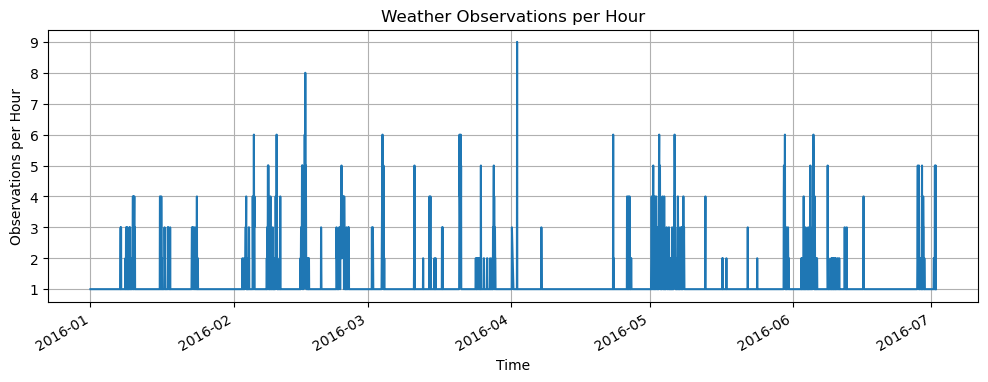

In [10]:
import matplotlib.pyplot as plt

# Plot time series frequency
plt.figure(figsize=(12, 4))
counts_per_hour.plot()
plt.title("Weather Observations per Hour")
plt.xlabel("Time")
plt.ylabel("Observations per Hour")
plt.grid(True)
plt.show()

Die Zeitstempel sind überwiegend stündlich verteilt, mit leichten Schwankungen.
Es gibt einige Einbrüche in der Frequenz; potenziell fehlende Stunden.
Die Daten scheinen nicht exakt auf der vollen Stunde zu liegen (z.B. xx:51).

### Minutenverteilung prüfen

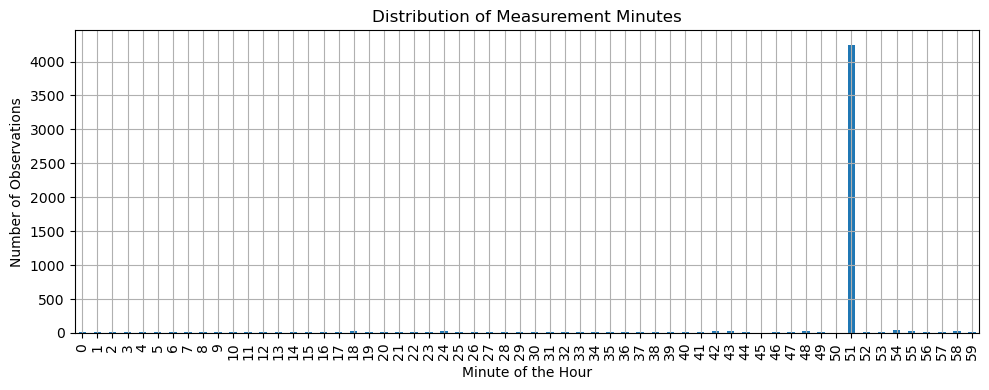

In [11]:
# Extract minute component from timestamp
weather['minute'] = weather['datetime'].dt.minute

# Count how many records fall into each minute of the hour
minute_distribution = weather['minute'].value_counts().sort_index()

# Plot the distribution of measurement minutes
plt.figure(figsize=(10, 4))
minute_distribution.plot(kind='bar')
plt.title("Distribution of Measurement Minutes")
plt.xlabel("Minute of the Hour")
plt.ylabel("Number of Observations")
plt.grid(True)
plt.tight_layout()
plt.show()

Erkenntnisse

Minute 51 ist bei weitem die häufigste Messminute (über 4000 Einträge).
Alle anderen Minuten sind selten oder sporadisch → vermutlich Ausnahmen, manuelle Nachträge oder andere Quellen.

### Dubletten prüfen

Analyseziel
- „Gibt es doppelte Zeitstempel nach Filterung auf minute == 51?“
- Wichtig für: saubere Aggregation, Eindeutigkeit beim Mergen mit anderen Datensätzen (z.B.
Taxi-Daten pro Stunde).

In [12]:
# Filter for rows measured at minute 51
weather_51 = weather[weather['minute'] == 51].copy()

# Count duplicated timestamps after filtering
duplicate_timestamps = weather_51['datetime'].duplicated().sum()

# Display all duplicated timestamp rows if any
duplicated_rows = weather_51[weather_51['datetime'].duplicated(keep=False)]

duplicate_timestamps, duplicated_rows.sort_values('datetime')

(np.int64(1),
                 timestamp  temp  windspeed  humidity  precip  pressure  \
 2092  2016-03-13 00:51:00  52.0        6.9      59.0     0.0     30.00   
 2093  2016-03-13 00:51:00  50.0        5.8      54.0     0.0     30.13   
 
       conditions dailyprecip dailysnow  fog  rain  snow            datetime  \
 2092       Clear           T      0.00    0     0     0 2016-03-13 00:51:00   
 2093  Light Rain           T      0.00    0     1     0 2016-03-13 00:51:00   
 
      date_time_hour  minute  
 2092     2016-03-13      51  
 2093     2016-03-13      51  )

Erkenntnisse

Genau ein Zeitstempel ist doppelt vorhanden: 2016-03-13 00:51:00
	Zwei unterschiedliche Einträge (Clear vs. Light Rain), vermutlich zwei Wetterquellen oder -messungen.




### Wetterdaten sinnvoll auf Stundenbasis aggregieren

Analyseziel (Fragestellung)

Ziel: saubere und eindeutige Repräsentation pro Stunde, bereit für Feature Engineering und Merging mit anderen Datensätzen.

Anmerkungen

"T" steht für “Trace”, also eine nicht messbare, aber vorhandene Menge Niederschlag –
typischerweise weniger als 0.005 inch.

In [14]:
# Convert daily precipitation/snow to numeric
weather_51['dailyprecip'] = pd.to_numeric(weather_51['dailyprecip'], errors='coerce')
weather_51['dailysnow'] = pd.to_numeric(weather_51['dailysnow'], errors='coerce')

# Aggregate to hourly level using mean for continuous values, max for binary flags
weather_date_time_hour = (
    weather_51.groupby('date_time_hour')
    .agg({
        'temp': 'mean',
        'windspeed': 'mean',
        'humidity': 'mean',
        'precip': 'sum',
        'pressure': 'mean',
        'dailyprecip': 'first',  # same within a day
        'dailysnow': 'first',
        'fog': 'max',
        'rain': 'max',
        'snow': 'max',
        'conditions': lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0]  # most frequent
    })
    .reset_index()
)
weather_date_time_hour.head()

,date_time_hour,temp,windspeed,humidity,precip,pressure,dailyprecip,dailysnow,fog,rain,snow,conditions
0,2016-01-01 00:00:00,42.1,4.6,51.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
1,2016-01-01 01:00:00,41.0,3.5,53.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
2,2016-01-01 02:00:00,41.0,4.6,55.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
3,2016-01-01 03:00:00,41.0,9.2,55.0,0.0,30.06,0.0,0.0,0,0,0,Overcast
4,2016-01-01 04:00:00,39.9,10.4,58.0,0.0,30.04,0.0,0.0,0,0,0,Overcast


In [15]:
weather.head()

,timestamp,temp,windspeed,humidity,precip,pressure,conditions,dailyprecip,dailysnow,fog,rain,snow,datetime,date_time_hour,minute
0,2016-01-01 00:51:00,42.1,4.6,51.0,0.0,30.06,Overcast,0.00,0.00,0,0,0,2016-01-01 00:51:00,2016-01-01 00:00:00,51
1,2016-01-01 01:51:00,41.0,3.5,53.0,0.0,30.06,Overcast,0.00,0.00,0,0,0,2016-01-01 01:51:00,2016-01-01 01:00:00,51
2,2016-01-01 02:51:00,41.0,4.6,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0,2016-01-01 02:51:00,2016-01-01 02:00:00,51
3,2016-01-01 03:51:00,41.0,9.2,55.0,0.0,30.06,Overcast,0.00,0.00,0,0,0,2016-01-01 03:51:00,2016-01-01 03:00:00,51
4,2016-01-01 04:51:00,39.9,10.4,58.0,0.0,30.04,Overcast,0.00,0.00,0,0,0,2016-01-01 04:51:00,2016-01-01 04:00:00,51



⸻

✅ Erkenntnisse
	Alle numerischen Wetterdaten sind jetzt als Stundenmittel (z. B. Temperatur, Wind).
	precip wurde summiert (für stündliche Gesamtniederschlagsmenge).
	conditions wurde als häufigster Zustand pro Stunde übernommen.
	fog, rain, snow sind binäre Indikatoren, zusammengefasst mit max().

⸻

🛠️ Nächste Schritte
	Du kannst jetzt:
	Einheiten umrechnen (z. B. temp in °C, wind in km/h)
	aus conditions gezielt Features wie is_clear ableiten
	die Daten mit den Taxi-Daten per hour joinen

Möchtest du nun mit der Umrechnung der Einheiten fortfahren? ￼

### Umrechnung der Einheiten

- **temp** (Fahrenheit) to temp_C
- **windspeed** (mph) to windspeed_Kph
- **precip** (inches) to precip_mm
- **pressure** (mbar) to pressure_Pa